In [1]:
# 這個Jupyter Notebook的環境
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
from keras.utils import plot_model

D:\python\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Platform: Windows-10-10.0.16299-SP0
Tensorflow version: 1.4.0
Keras version: 2.1.2


In [2]:
from keras.models import Sequential
from keras.layers import Dense

# 構建模型1
model = Sequential([Dense(2, input_shape=(1,)), Dense(1)])


# 構建模型2
model = Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1))

#以上二者等价

In [3]:
from keras.layers import Input
from keras.models import Model
mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)

model = Model(inputs=mnist_input, outputs=hidden)

# 标准网络模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 731,530
Trainable params: 731,530
Non-trainable params: 0
_________________________________________________________________


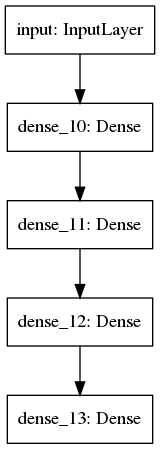

In [8]:
#多层感知机

mnist_input = Input(shape=(784,), name='input')
hidden1 = Dense(512,activation='relu')(mnist_input)
hidden2 = Dense(512,activation='relu')(hidden1)
hidden3 = Dense(128,activation='relu')(hidden2)

output  = Dense(10,activation='softmax')(hidden3)

model = Model(inputs=mnist_input,outputs=output)
model.summary()
plot_model(model,to_file='MLP.png')
Image('MLP.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650       
Total para

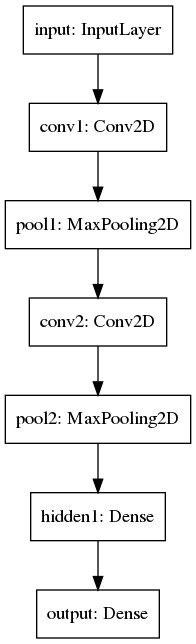

In [9]:
# CNN

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D


mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, kernel_size=4, activation='relu',
               name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)


# 打印網絡結構
model.summary()

# 產生網絡拓撲圖
plot_model(model, to_file='convolutional_neural_network.png')

# 秀出網絡拓撲圖
Image('convolutional_neural_network.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784, 1)            0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128)               66560     
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________


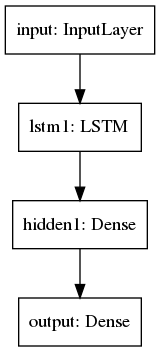

In [10]:
from keras.layers.recurrent import LSTM

mnist_input = Input(shape=(784, 1), name='input') # 把每一個像素想成是一序列有前後關係的time_steps

lstm1 = LSTM(128, name='lstm1')(mnist_input)
hidden1 = Dense(128,activation='relu',name='hidden1')(lstm1)
output = Dense(10,activation='softmax',name='output')(hidden1)
model=Model(inputs=mnist_input,outputs=output)

model.summary()
# 產生網絡拓撲圖
plot_model(model, to_file='recurrent_neural_network.png')

# 秀出網絡拓撲圖
Image('recurrent_neural_network.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

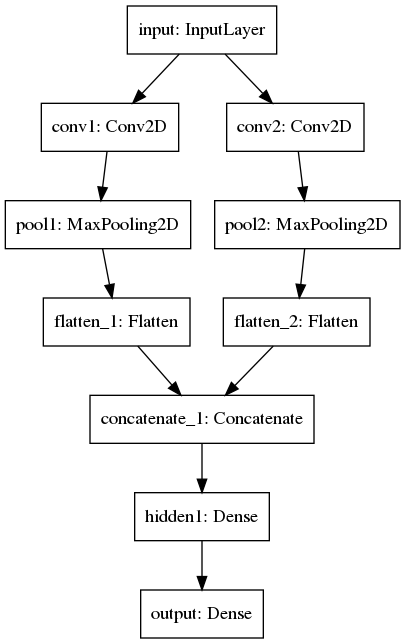

In [12]:
# 共享层模型
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, Flatten

# 輸入層
mnist_input = Input(shape=(28, 28, 1), name='input')

# 第一层卷积
conv1 = Conv2D(32, kernel_size=4, activation='relu',
               name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# 第二层卷积
conv2 = Conv2D(16, kernel_size=8, activation='relu',
               name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

# 特征融合
merge = concatenate([flat1, flat2])

hidden1 = Dense(64, activation='relu', name='hidden1')(merge)
output = Dense(10, activation='softmax', name='output')(hidden1)

model=Model(inputs=mnist_input,outputs=output)

model.summary()
# plot graph
plot_model(model, to_file='shared_input_layer.png')

# 秀出網絡拓撲圖
Image('shared_input_layer.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm1[0][0]                      
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
__________________________________________________________________________________________________
interp11 (

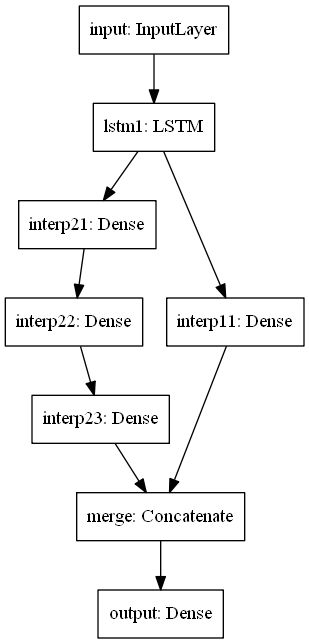

In [3]:
# LSTM提取
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input')

extract1 = LSTM(128, name='lstm1')(mnist_input)

interp11 = Dense(64, activation='relu', name='interp11')(extract1)

interp21 = Dense(64, activation='relu', name='interp21')(extract1)  # <-- 看這裡
interp22 = Dense(32, activation='relu', name='interp22')(interp21)  # <-- 看這裡
interp23 = Dense(16, activation='relu', name='interp23')(interp22)  # <-- 看這裡

merge = concatenate([interp11, interp23], name='merge')

output = Dense(10, activation='softmax', name='output')(merge)

model = Model(inputs=mnist_input, outputs=output)
model.summary()

# plot graph
plot_model(model, to_file='shared_feature_extractor.png')

# 秀出網絡拓撲圖
Image('shared_feature_extractor.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
__________________________________________________________________________________________________
pool11 (Ma

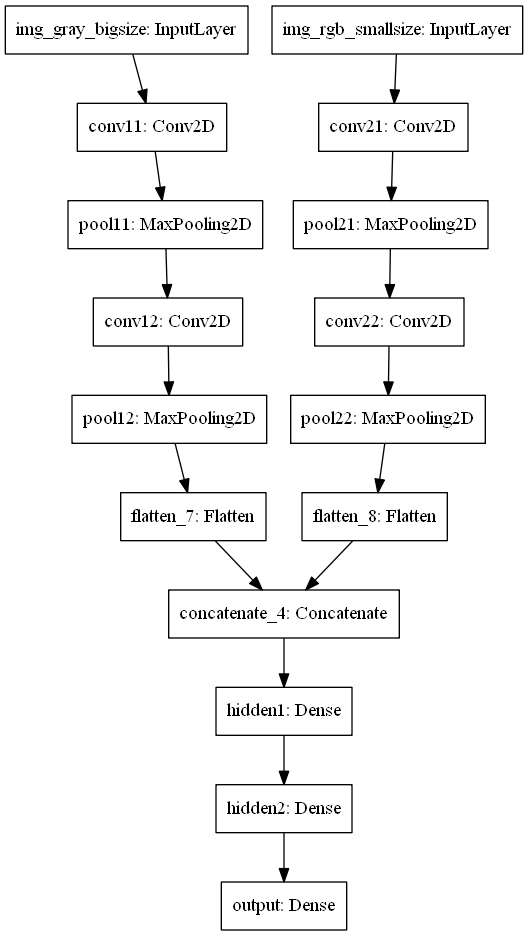

In [9]:
# 多输入模型
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')

conv11 = Conv2D(32, kernel_size=4, activation='relu',
                name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(32, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool12')(conv12)
flatten_11 = Flatten()(pool12)


img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu',
                name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(32, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flatten_12 = Flatten()(pool22)

merge = concatenate([flatten_11, flatten_12])

hidden1 = Dense(100, activation='relu', name='hidden1')(merge)
hidden2 = Dense(100, activation='relu', name='hidden2')(hidden1)
output = Dense(10, activation='softmax', name='output')(hidden2)


model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

model.summary()
# plot graph
plot_model(model, to_file='multiple_inputs.png')

# 秀出網絡拓撲圖
Image('multiple_inputs.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
extract (LSTM)                  (None, 784, 64)      16896       input[0][0]                      
__________________________________________________________________________________________________
class1 (LSTM)                   (None, 32)           12416       extract[0][0]                    
__________________________________________________________________________________________________
class2 (Dense)                  (None, 32)           1056        class1[0][0]                     
__________________________________________________________________________________________________
output1 (D

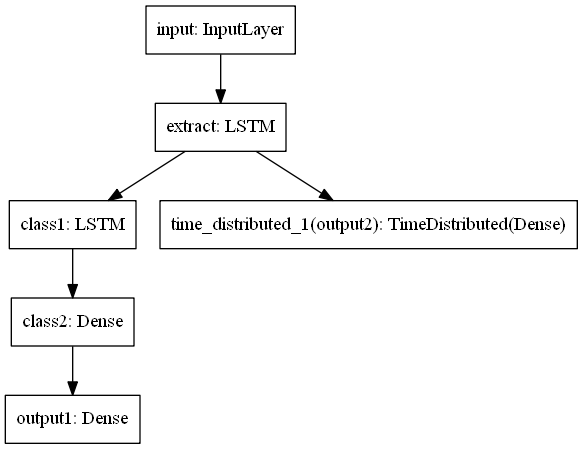

In [10]:
# 多输出模型
from keras.layers.wrappers import TimeDistributed

mnist_input = Input(shape=(784,1), name='input')

extract=LSTM(64, return_sequences=True,name='extract')(mnist_input)

#分类输出
class1 = LSTM(32, name='class1')(extract)
class2= Dense(32, activation='relu', name='class2')(class1)
output1 = Dense(10,activation='softmax', name='output1')(class2)

#序列输出
output2 = TimeDistributed(Dense(10,activation='softmax',name='output2'))(extract)


model = Model(inputs=mnist_input, outputs=[output1, output2])



# 打印網絡結構
model.summary()

# plot graph
plot_model(model, to_file='multiple_outputs.png')

# 秀出網絡拓撲圖
Image('multiple_outputs.png')
